In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。<br>

$$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\ $$

$x$ : 特徴量ベクトル<br>
$\theta$ : パラメータベクトル<br>
$n$ : 特徴量の数<br>
$x_j$ : j番目の特徴量<br>
$\theta_j$ : j番目のパラメータ（重み）<br>

特徴量の数nは任意の値に対応できる実装にしてください。<br>
なお、ベクトル形式で表すと以下のようになります。

$$h_\theta(x) = \theta^T \cdot x.$$

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。<br>
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。<br>

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}] $$

$\alpha$ : 学習率<br>
$i$ : サンプルのインデックス<br>
$j$ : 特徴量のインデックス<br>

# 【問題3】推定
推定する仕組みを実装してください。<br>
ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。<br>
仮定関数 $h_\theta(x)$ の出力が推定結果です。

# 【問題】１〜3の回答は、【問題】５の下にあるScratchLogisticRegressionクラスに実装

# 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$$L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$$


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

### 平均二乗誤差（mean square error, MSE）の関数を作成

In [2]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = sum((y_pred[i] - y[i])**2 for i in range(y.shape[0])) / y.shape[0]
    
    mse = mse.astype(np.float32)
    
    pass
    return mse

# 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(\theta)$ は次の式です。

$$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2. $$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値

# 【問題】１〜３、５の回答をScratchLogisticRegressionクラスに実装

In [3]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数（反復回数）
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X_in, y, X_val_in=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        #訓練データの処理
        w_up_array = [] #更新された重みを格納するリスト
        for i in range(self.iter):
            y_pred, X, w = self._linear_hypothesis(X_in, w_up_array) #仮定関数
            error = y_pred - y.reshape(-1, 1) #誤差の算出
            w_update = self._gradient_descent(X, w, error) #重みの更新
            w_up_array.append([a for a in w_update]) #更新された重みをリストへ格納
            self.loss[i] = self._cost_function(y_pred, y)  #目的関数       
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
        
        #学習済みのパラメータ（重み）
        self.coef_ = np.array([w_up_array]).flatten()[-(X.shape[1]):].reshape(X.shape[1], 1)
        
        
        #検証データの処理
        if X_val_in is None and y_val is None:
            pass
        else:
            w_up_array_val = [] #更新された重みを格納するリスト
            for i in range(self.iter):
                y_pred_val, X_val, w_val = self._linear_hypothesis(X_val_in, w_up_array_val) #仮定関数
                error_val = y_pred_val - y_val.reshape(-1, 1) #誤差の算出
                w_update_val = self._gradient_descent(X_val, w_val, error_val) #重みの更新
                w_up_array_val.append([a for a in w_update_val]) #更新された重みをリストへ格納
                self.val_loss[i] = self._cost_function(y_pred_val, y_val)  #目的関数       
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print(self.val_loss)
        
        pass
    
    def _gradient_descent(self, X, w, error):
        """
        最急降下法により、最適なパラメータwを学習させる

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        error : 予測値と目的変数との誤差
        
        w : パラメータ（重み）

        """
        j_mean_array = np.array([])
        for j in range(X.shape[1]):   #X_add_1の列番号を抽出
            #抽出した列の要素を一つずつ処理し、列の平均を算出
            j_mean = sum(error[i] * X[i, j] for i in range(X.shape[0])) / X.shape[0]
            j_mean_array = np.append(j_mean_array,  j_mean)
       
        w_update = (w.T - self.lr * j_mean_array).T #重みの更新
        
        pass
        return w_update #更新した重みをリターン
    
    def _cost_function(self, y_pred, y):
        cost = MSE(y_pred, y) / 2
        return cost
        
    def _linear_hypothesis(self, X, w_up_array):   #【問題1】の仮定関数を実装
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """    
        if self.no_bias:
            pass
        else:
            n_samples = X.shape[0]
            add_1 = np.array([[1] * n_samples]).T #バイアス用に１の列を作成
            X = np.hstack([add_1, X]) #Xに１の列を追加
        
        if type(w_up_array) is np.ndarray:
            w = w_up_array
        elif len(w_up_array) > 0:
            w = np.array([w_up_array]).flatten()[-(X.shape[1]):].reshape(X.shape[1], 1)
        else:
            w = np.random.random((X.shape[1], 1)) #ランダムでパラメータを設定
        
        #仮定関数
        y_pred = X @ w #wは、w.shape = (X.shape[1], 1)  の２次元

        pass
        return y_pred, X, w
    
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X_val = X
        w = self.coef_
        y_pred_val, X_val, w = self._linear_hypothesis(X_val, w) #仮定関数より、学習された重みを使って推定
        
        pass
        return y_pred_val

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。<br>
scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# House Pricesデータセットを取得
df = pd.read_csv("/Users/takahashihideyuki/dive/diveintocode-ml/Week4/train.csv", encoding="utf-8")
X = df[["GrLivArea", "YearBuilt"]] #説明変数を抽出
y = df["SalePrice"] #目的変数を抜き出し抽出

#ndarray型へ変更
X_data = np.array(X)
y_data = np.array(y)

# 訓練データと検証データの分割。訓練データ75%、検証データ25%として分割する。
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.75, random_state=123)
    
#標準化
scaler = StandardScaler()
scaler.fit(X_train) #訓練用のデータでfit
X_train_std = scaler.transform(X_train) #訓練用データをtransform
X_test_std = scaler.transform(X_test) #検証用データをtransform

In [6]:
#今回スクラッチしたモデル
slr = ScratchLinearRegression(num_iter=1000, lr=10**-1, no_bias=None, verbose=None)
slr.fit(X_train_std, y_train, X_test_std, y_test) #学習
y_pred = slr.predict(X_test_std) #推定
print(slr.coef_) #学習された重み
print(int(MSE(y_pred, y_test))) #平均二乗誤差の算出

[[180201.98812785]
 [ 49721.78398338]
 [ 32703.45086804]]
1983765888


In [7]:
#LinearRegressionにて確認
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_std, y_train) #学習
y_pred = lin.predict(X_test_std) #推定
print(lin.coef_) #学習された重み
print(MSE(y_pred, y_test)) #平均二乗誤差の算出
lin.get_params()

[49721.78398338 32703.45086804]
1983765900.0


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [8]:
#SGDRegressorにて確認
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(X_train_std, y_train) #学習
y_pred = sgdr.predict(X_test_std) #推定
print(sgdr.coef_) #学習された重み
print(MSE(y_pred, y_test)) #平均二乗誤差の算出
sgdr.get_params()

[49102.532172   32100.42070563]
1991807700.0


{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### 結果まとめ
num_iter=1000、 lr=10**-1に設定し、平均二乗誤差にて比較したところ、今回スクラッチしたモデルとLinerRegressionは、<br>
ほぼ同じ結果となった。また、SGDRegressorもかなり近い結果となった。<br>
sklearnのパラメータ設定についてまだ理解が出来ていないが、パラメータの設定次第で結果が異なってくる為、理解を深めていく。

In [25]:
conclusion = pd.DataFrame([1983765888, 1983765900.0, 1991807700.0])
conclusion.index = ["今回スクラッチしたモデル", "LinearRegression", "SGDRegressor"]
conclusion.columns = ["平均二乗誤差"]
conclusion

,平均二乗誤差
今回スクラッチしたモデル,1.983766e+09
LinearRegression,1.983766e+09
SGDRegressor,1.991808e+09


# 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。<br>
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

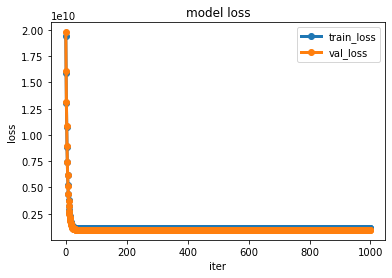

In [10]:
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(slr.loss, label="train_loss", marker="o", linewidth=3)
plt.plot(slr.val_loss, label="val_loss", marker="o", linewidth=3)
plt.legend()
plt.show()

### 学習を重ねるとlossが下がり、サチュレートしている。

# 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 $\theta_0$ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [11]:
#今回スクラッチしたモデル（バイアス有り）
slr = ScratchLinearRegression(num_iter=1000, lr=10**-1, no_bias=None, verbose=None)
slr.fit(X_train_std, y_train, X_test_std, y_test) #学習
y_pred = slr.predict(X_test_std) #推定
print(slr.coef_) #学習された重み
print(int(MSE(y_pred, y_test))) #平均二乗誤差の算出

[[180201.98812785]
 [ 49721.78398338]
 [ 32703.45086804]]
1983765888


In [12]:
#今回スクラッチしたモデル（バイアス無し）
slr = ScratchLinearRegression(num_iter=1000, lr=10**-1, no_bias=True, verbose=None)
slr.fit(X_train_std, y_train, X_test_std, y_test) #学習
y_pred_no_bias = slr.predict(X_test_std) #推定
print(slr.coef_) #学習された重み
print(int(MSE(y_pred, y_test))) #平均二乗誤差の算出

[[49721.78398338]
 [32703.45086805]]
1983765888


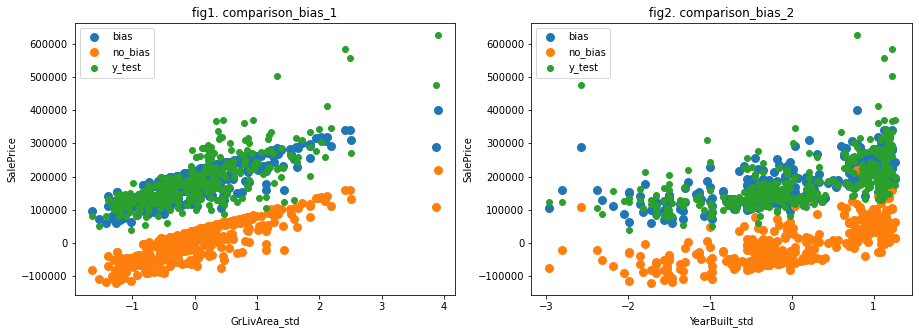

In [13]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121, title='fig1. comparison_bias_1')
plt.xlabel("GrLivArea_std")
plt.ylabel("SalePrice")
plt.scatter(X_test_std[:, 0], y_pred, label="bias", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 0], y_pred_no_bias, label="no_bias", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 0], y_test, label="y_test", marker="o", linewidth=1)
plt.legend()
ax2 = fig.add_subplot(122, title='fig2. comparison_bias_2')
plt.xlabel("YearBuilt_std")
plt.ylabel("SalePrice")
plt.scatter(X_test_std[:, 1], y_pred, label="bias", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 1], y_pred_no_bias, label="no_bias", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 1], y_test, label="y_test", marker="o", linewidth=1)
plt.legend()

plt.show()

### <考察>
### バイアス項 $\theta_0$は切片で有り、バイアス項を抜くと傾きのみ学習することになり、切片が学習されないことから、バイアス項有りに対して全体的にY軸がオフセットした形となる。 バイアス項有りは切片も学習することから、正解ラベルに対してオフセットせず重なった位置で出力される。（fig1,2参照）

# 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

### 二乗

In [14]:
#特徴量を二乗
X_data2 = X_data**2

# 訓練データと検証データの分割。訓練データ75%、検証データ25%として分割する。
X_train, X_test, y_train, y_test = train_test_split(X_data2, y_data, train_size=0.75, random_state=123)
    
#標準化
scaler = StandardScaler()
scaler.fit(X_train) #訓練用のデータでfit
X_train_std = scaler.transform(X_train) #訓練用データをtransform
X_test_std = scaler.transform(X_test) #検証用データをtransform

In [15]:
#今回スクラッチしたモデル（バイアス有り）
slr = ScratchLinearRegression(num_iter=1000, lr=10**-1, no_bias=None, verbose=None)
slr.fit(X_train_std, y_train, X_test_std, y_test) #学習
y_pred = slr.predict(X_test_std) #推定
print(slr.coef_) #学習された重み
print(int(MSE(y_pred, y_test))) #平均二乗誤差の算出

[[180201.98812785]
 [ 45301.7199001 ]
 [ 35762.29804269]]
2019117952


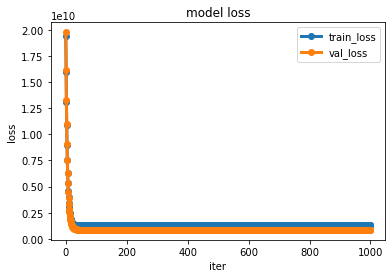

In [16]:
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(slr.loss, label="train_loss", marker="o", linewidth=3)
plt.plot(slr.val_loss, label="val_loss", marker="o", linewidth=3)
plt.legend()
plt.show()

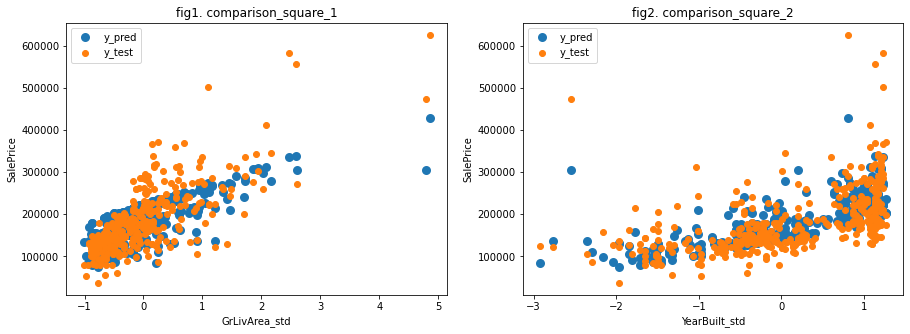

In [17]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121, title='fig1. comparison_square_1')
plt.xlabel("GrLivArea_std")
plt.ylabel("SalePrice")
plt.scatter(X_test_std[:, 0], y_pred, label="y_pred", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 0], y_test, label="y_test", marker="o", linewidth=1)
plt.legend()
ax2 = fig.add_subplot(122, title='fig2. comparison_square_2')
plt.xlabel("YearBuilt_std")
plt.ylabel("SalePrice")
plt.scatter(X_test_std[:, 1], y_pred, label="y_pred", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 1], y_test, label="y_test", marker="o", linewidth=1)
plt.legend()

plt.show()

### 三乗

In [18]:
#特徴量を三乗
X_data3 = X_data**3

# 訓練データと検証データの分割。訓練データ75%、検証データ25%として分割する。
X_train, X_test, y_train, y_test = train_test_split(X_data3, y_data, train_size=0.75, random_state=123)
    
#標準化
scaler = StandardScaler()
scaler.fit(X_train) #訓練用のデータでfit
X_train_std = scaler.transform(X_train) #訓練用データをtransform
X_test_std = scaler.transform(X_test) #検証用データをtransform

In [19]:
#今回スクラッチしたモデル（バイアス有り）
slr = ScratchLinearRegression(num_iter=1000, lr=10**-1, no_bias=None, verbose=None)
slr.fit(X_train_std, y_train, X_test_std, y_test) #学習
y_pred = slr.predict(X_test_std) #推定
print(slr.coef_) #学習された重み
print(int(MSE(y_pred, y_test))) #平均二乗誤差の算出

[[180201.98812785]
 [ 34969.70541827]
 [ 38862.08767784]]
2694331136


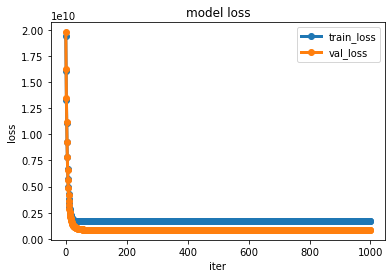

In [20]:
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(slr.loss, label="train_loss", marker="o", linewidth=3)
plt.plot(slr.val_loss, label="val_loss", marker="o", linewidth=3)
plt.legend()
plt.show()

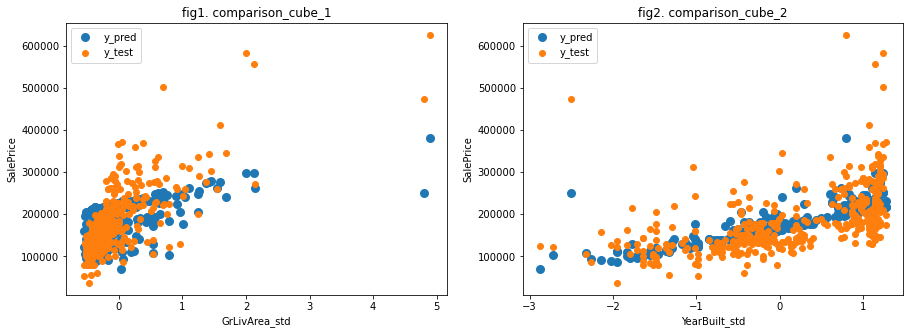

In [21]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121, title='fig1. comparison_cube_1')
plt.xlabel("GrLivArea_std")
plt.ylabel("SalePrice")
plt.scatter(X_test_std[:, 0], y_pred, label="y_pred", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 0], y_test, label="y_test", marker="o", linewidth=1)
plt.legend()
ax2 = fig.add_subplot(122, title='fig2. comparison_cube_2')
plt.xlabel("YearBuilt_std")
plt.ylabel("SalePrice")
plt.scatter(X_test_std[:, 1], y_pred, label="y_pred", marker="o", linewidth=3)
plt.scatter(X_test_std[:, 1], y_test, label="y_test", marker="o", linewidth=1)
plt.legend()

plt.show()

In [22]:
display(X.describe())
display(pd.DataFrame(X_data2).describe())
display(pd.DataFrame(X_data3).describe())

,GrLivArea,YearBuilt
count,1460.000000,1460.000000
mean,1515.463699,1971.267808
std,525.480383,30.202904
min,334.000000,1872.000000
25%,1129.500000,1954.000000
50%,1464.000000,1973.000000
75%,1776.750000,2000.000000
max,5642.000000,2010.000000


,0,1
count,1.460000e+03,1.460000e+03
mean,2.572571e+06,3.886808e+06
std,2.064173e+06,1.185213e+05
min,1.115560e+05,3.504384e+06
25%,1.275771e+06,3.818116e+06
50%,2.143296e+06,3.892729e+06
75%,3.156842e+06,4.000000e+06
max,3.183216e+07,4.040100e+06


,0,1
count,1.460000e+03,1.460000e+03
mean,4.932875e+09,7.665517e+09
std,7.985861e+09,3.489101e+08
min,3.725970e+07,6.560207e+09
25%,1.440985e+09,7.460599e+09
50%,3.137785e+09,7.680354e+09
75%,5.608925e+09,8.000000e+09
max,1.795971e+11,8.120601e+09


### 二乗や三乗を入力に利用することでデータの分布が変わり、学習結果の傾きが小さくなる。

# 【問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$$

以下の式から説明をはじめることができます。

$$ \theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\ $$

目的関数（損失関数） 𝐽(𝜃) は次の式です。


$$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$$

### 目的関数を重みθで偏微分することでその地点での接線の傾きを求め、傾きの絶対値を小さくする方向に学習率αの分だけ地点を移動させ重みθを更新していき、接線の傾きが最小となる点を探索的に求めている。

# 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

### 線形回帰では最適化手法に最小二乗法を用いており、２次関数を微分して重みを更新する。２次関数はfig1のように放物線となり、局所最適解＝大域最適解になる為である。

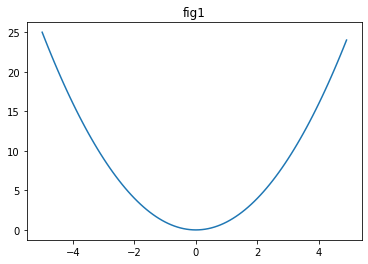

In [24]:
x = np.arange(-5, 5, 0.1)
y = x**2
plt.title("fig1")
plt.plot(x, y)
plt.show()